# Objective: 

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

In [130]:
# Load Datasets 
sorteos_df = pd.read_csv('../Data/downloaded/sorteos_export.csv')
premios_df = pd.read_csv('../Data/downloaded/premios_export.csv')

In [131]:
# Join datasets by 'numero_sorteo'
df = pd.merge(premios_df, sorteos_df, on='numero_sorteo', how='inner')

# Removing column "id"
df.drop(columns=['id'], inplace=True)


## Data imputation

In [132]:
# replace the null values with "N/A"
"""
Vendedor, ciudad and departamento are categorical variables, 
and filling them with N/A does not affect the analysis.
"""

df['vendedor'] = df['vendedor'].fillna("N/A")
df['ciudad'] = df['ciudad'].fillna("N/A")
df['departamento'] = df['departamento'].fillna("N/A")

# Save the new dataset for latter analysis in AWS QuickSight
df.to_csv('../Data/processed/data_combined.csv', index=False)

df

,numero_sorteo,numero_premiado,letras,monto,vendedor,ciudad,departamento,tipo_sorteo,fecha_sorteo,fecha_caducidad,primer_premio,segundo_premio,tercer_premio,reintegro_primer_premio,reintegro_segundo_premio,reintegro_tercer_premio
0,390,44,P,600.0,N/A,N/A,N/A,EXTRAORDINARIO,2024-06-08,2024-12-09,16780,46129,77885,0,9,5
1,390,80,DT,600.0,N/A,N/A,N/A,EXTRAORDINARIO,2024-06-08,2024-12-09,16780,46129,77885,0,9,5
2,390,129,TT,1000.0,N/A,N/A,N/A,EXTRAORDINARIO,2024-06-08,2024-12-09,16780,46129,77885,0,9,5
3,390,180,DT,600.0,N/A,N/A,N/A,EXTRAORDINARIO,2024-06-08,2024-12-09,16780,46129,77885,0,9,5
4,390,228,P,800.0,N/A,N/A,N/A,EXTRAORDINARIO,2024-06-08,2024-12-09,16780,46129,77885,0,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31891,3046,79292,P,700.0,N/A,N/A,N/A,ORDINARIO,2024-06-01,2024-12-02,46063,40361,39987,3,1,7
31892,3046,79361,TT,600.0,N/A,N/A,N/A,ORDINARIO,2024-06-01,2024-12-02,46063,40361,39987,3,1,7
31893,3046,79375,P,700.0,N/A,N/A,N/A,ORDINARIO,2024-06-01,2024-12-02,46063,40361,39987,3,1,7
31894,3046,79567,PR,670.0,N/A,N/A,N/A,ORDINARIO,2024-06-01,2024-12-02,46063,40361,39987,3,1,7


## What is the Distribution Prize of Loteria Santa Lucia? (InterQuartile Range)

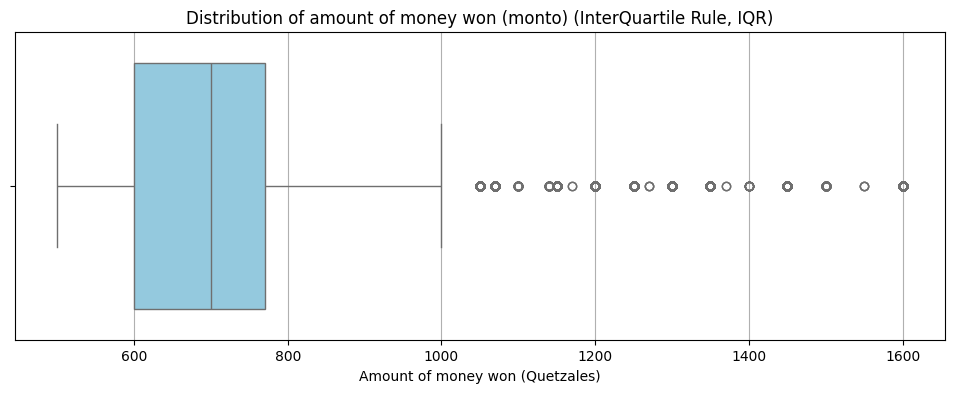

In [133]:
Q1 = df['monto'].quantile(0.25)
Q3 = df['monto'].quantile(0.75)
IQR = Q3 - Q1

# Filter values within the interquartile range
df_filtered_IQR = df[(df['monto'] >= Q1 - 1.5 * IQR) & (df['monto'] <= Q3 + 1.5 * IQR)]

plt.figure(figsize=(12, 4))

# Create boxplot without outliers
sns.boxplot(x=df_filtered_IQR['monto'], color='skyblue')
plt.title("Distribution of amount of money won (monto) (InterQuartile Rule, IQR)")
plt.xlabel("Amount of money won (Quetzales)")
plt.grid(axis='x')
plt.show()

So with this you can see that 50% of the prizes won are **between Q600.00 and almost Q800.00**
With a **median aprox of Q750.00**

## What is the distribution of the Winning Numbers of Loteria Santa Lucia?

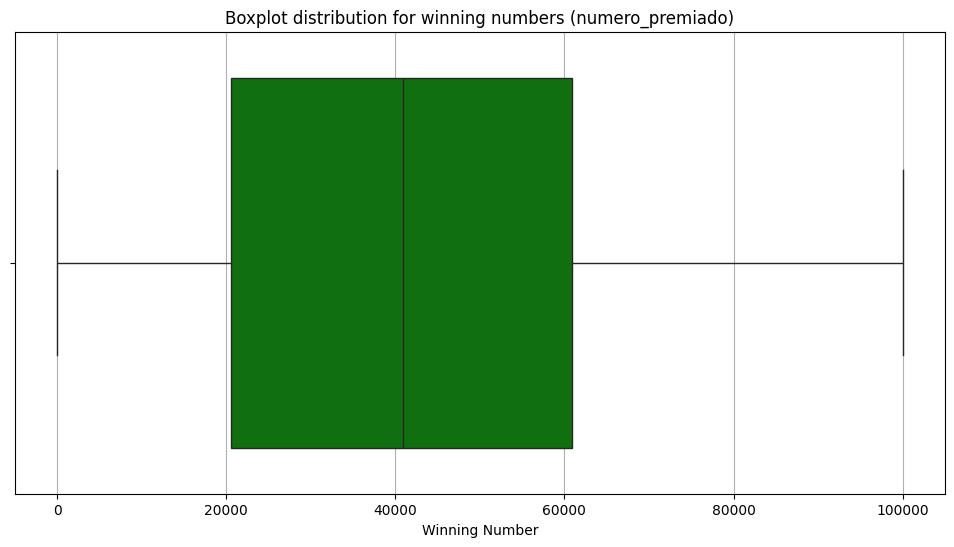

In [134]:
plt.figure(figsize=(12, 6))

# Create boxplot for the winning numbers
sns.boxplot(x=df['numero_premiado'], color='green')
plt.title('Boxplot distribution for winning numbers (numero_premiado)')
plt.xlabel('Winning Number')
plt.grid(axis='x')
plt.show()

So, in the boxplot you can see that **50%** of winning numbers are located **between 21,000 and 62,000** aprox.
With a **median of 42,000**

## What is the distribution for the Letter Combinations (letras) of Loteria Santa Lucia? 

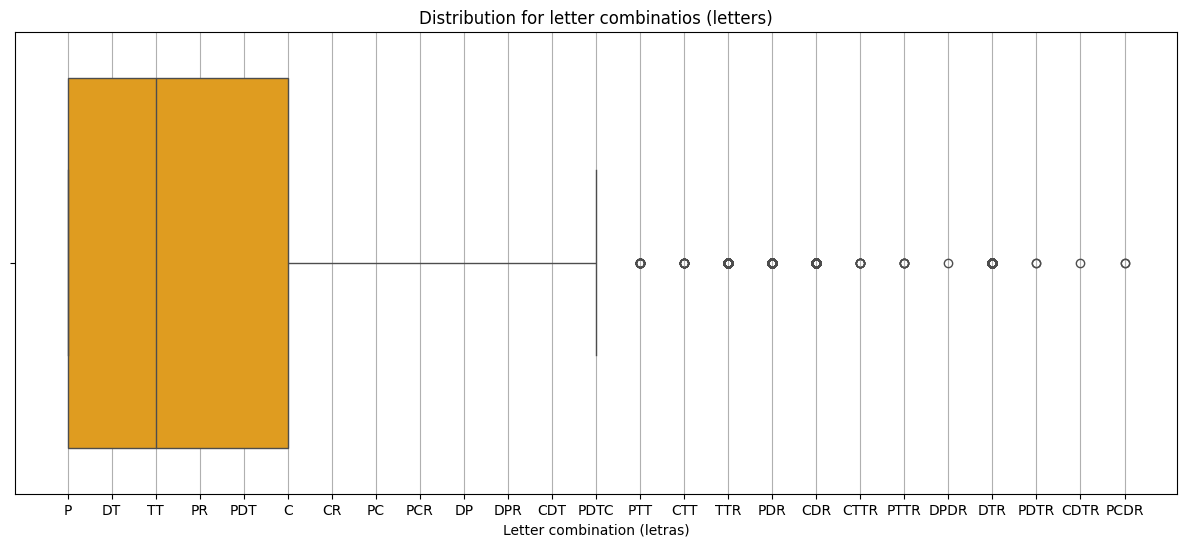

In [135]:
plt.figure(figsize=(15, 6))

# Create boxplot for letter distribution
sns.boxplot(x=df['letras'], color='orange')
plt.title('Distribution for letter combinatios (letters)')
plt.xlabel('Letter combination (letras)')
plt.grid(axis='x')
plt.show()

#### What does this mean? 50% of all letter combinations are located in: P, DT, TT, PR, PDT and C

Each letter stands for: 

**P:** Prmeio (Prize, won some money like Q600)

**DT:** Doble terminacion (if 1st, 2nd or 3thd palce finsih with "55" any number that also finished with "55" will get some money)

**TT:** Triple Terminacion (if 1st, 2nd or 3thd place finsih with "756" any number that also finished with "756" will get some money)

**PR:** Premio y Reintegro (Prize and Refund, won some money and you get again a new ticket for next lottery)

**PDT:** Premio y Doble Terminacion (Won some money and fished with the last 2 numbers as the 1st, 2nd or 3rd place)

**C:** Centena (If the 1st, 2nd or 3thd place has a number like "55049" any number between 55000 and 55100 will get some money)

## Boxplot for numbers and letter combinations ('numeros_premiados', 'letras')

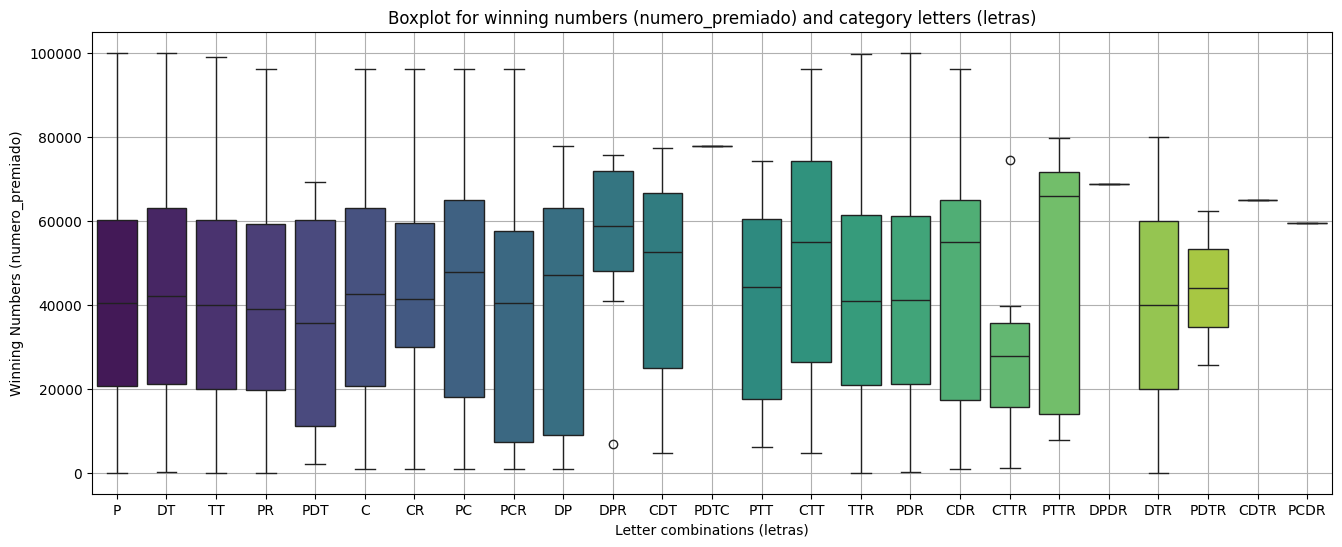

In [157]:
plt.figure(figsize=(16, 6))

# Boxplot by letters ('letras')
sns.boxplot(x='letras', y='numero_premiado', data=df, palette='viridis', hue='letras', dodge=False)

plt.title('Boxplot for winning numbers (numero_premiado) and category letters (letras)')
plt.xlabel('Letter combinations (letras)')
plt.ylabel('Winning Numbers (numero_premiado)')
plt.grid(True)
plt.show()

What does this mean? Well, it means that the numbers with the letter comination for "p" a mostly located between 20,000 and 60,000 e.g. if you buy a ticket number with the number 40,000 good chances are that it will get the letter "p" (of course if you get some prize in lottery) 

## Analyze Sales and Insights for the columns of the seler, city and department "vendedor", "ciudad" y "departamento"

In [159]:
df_filtered_vendedor_city_department = df[
    (df['vendedor'] != "N/A") &
    (df['ciudad'] != "N/A") &
    (df['departamento'] != "N/A")
]

### Top 10 seller with more winning numbers

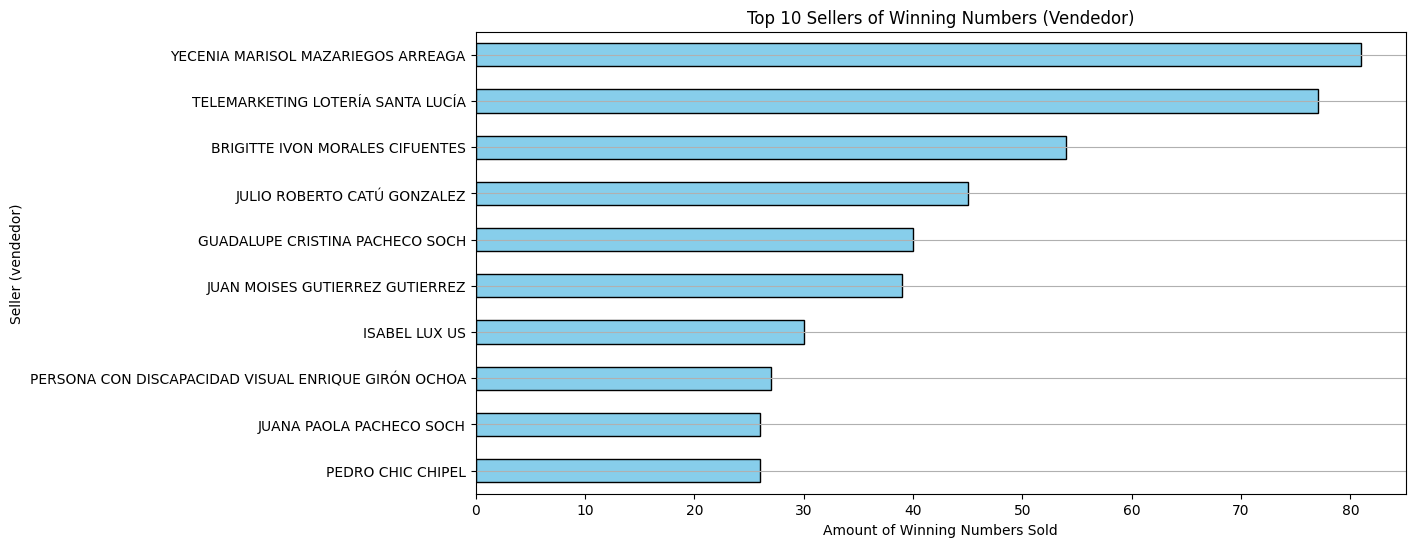

In [ ]:
# top 10 seller with more winning numbers
vendedores = df_filtered_vendedor_city_department['vendedor'].value_counts()

plt.figure(figsize=(12, 6))
vendedores.head(10).iloc[::-1].plot(kind='barh', color='skyblue', edgecolor='black') # .iloc[::-1], inverstion of the order of the dataset
plt.title("Top 10 Sellers of Winning Numbers (Vendedor)")
plt.ylabel("Seller (vendedor)")
plt.xlabel("Amount of Winning Numbers Sold")
plt.grid(axis='x')
plt.show()

## What are the top 5 of most frequent Refounds? (Reintegros) by 1st, 2nd and 3thd place and in General

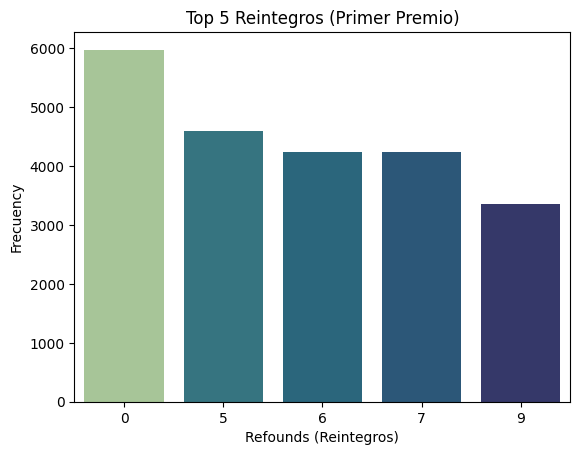

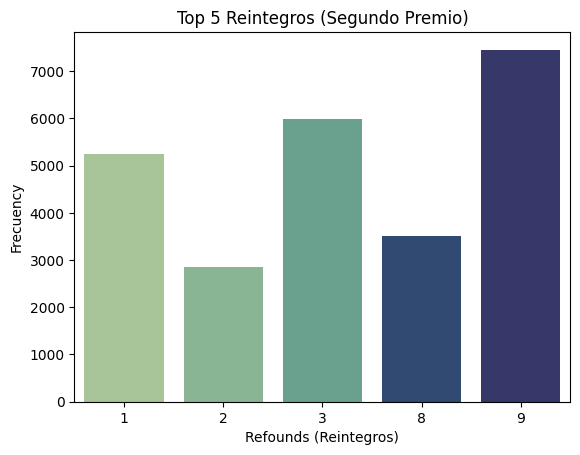

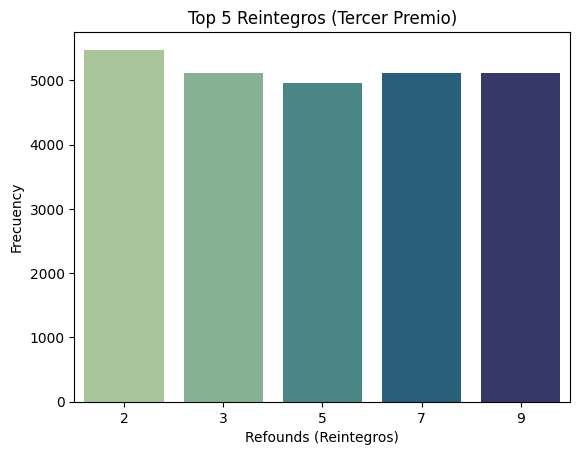

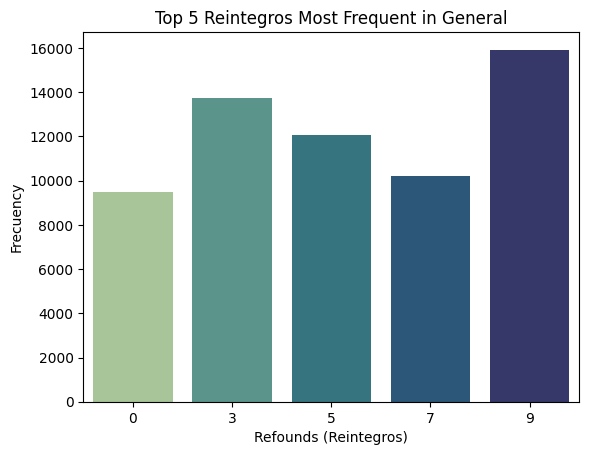

In [136]:
all_reintegros = pd.concat([
    df['reintegro_primer_premio'],
    df['reintegro_segundo_premio'],
    df['reintegro_tercer_premio']
])

def plot_top_5_reintegros(column_dataset, plot_title):
    top_5 = column_dataset.value_counts().head(5)
    
    # Create the barplot for the frequency
    sns.barplot(x=top_5.index, y=top_5.values, palette='crest', hue=top_5.index, legend=False)
    plt.title(plot_title)
    plt.xlabel("Refounds (Reintegros)")
    plt.ylabel("Frecuency")
    plt.show()

plot_top_5_reintegros(df['reintegro_primer_premio'], 'Top 5 Reintegros (Primer Premio)')
plot_top_5_reintegros(df['reintegro_segundo_premio'], 'Top 5 Reintegros (Segundo Premio)')
plot_top_5_reintegros(df['reintegro_tercer_premio'], 'Top 5 Reintegros (Tercer Premio)')
plot_top_5_reintegros(all_reintegros, 'Top 5 Reintegros Most Frequent in General')

## What is the Percentage of Winning Numbers by Lottery? 

## (Ordario and Extraordinario)

The lotery **'ordinario'** normaly sales up to **80,000 tickets**

The **'extraodinario'** can sale up to **90,000 tickets** (in special editions they can sale up to 100,000 tickets).

In [137]:
# See how many 'sorteos' we have in ORDINARIOS and EXTRAORDINARIOS
df_ordinarios = df[df['tipo_sorteo'] == 'ORDINARIO']
df_extraordinarios = df[df['tipo_sorteo'] == 'EXTRAORDINARIO']

total_sorteos_ordinarios = df_ordinarios['numero_sorteo'].nunique()
total_sorteos_extraordinarios = df_extraordinarios['numero_sorteo'].nunique()

print(f"Total number of sorteos ordinarios: {total_sorteos_ordinarios}")
print(f"Total number of sorteos extraordinarios: {total_sorteos_extraordinarios}")



Total number of sorteos ordinarios: 24
Total number of sorteos extraordinarios: 6


In [138]:
# Total Winning numbers by sorteo ordinario and extraordinario
winners_by_sorteo_ordinario = df_ordinarios['numero_premiado'].count()
winners_by_sorteo_extraordinario = df_extraordinarios['numero_premiado'].count()

winners_by_sorteo_ordinario = winners_by_sorteo_ordinario.sum()
winners_by_sorteo_extraordinario = winners_by_sorteo_extraordinario.sum()

print(f"Total number of winning numbers in ORDINARIO lotteries: {winners_by_sorteo_ordinario}")
print(f"Total number of winning numbers in EXTRAORDINARIO lotteries: {winners_by_sorteo_extraordinario}")

Total number of winning numbers in ORDINARIO lotteries: 21866
Total number of winning numbers in EXTRAORDINARIO lotteries: 10030


#### Calculate percentage of winning numbers for both ordinario and extraordinario

In [139]:
tickets_issued_ordinario = 80_000

# Calculate percentage of winning numbers
grand_total_tickets_issued_ordinario = total_sorteos_ordinarios * tickets_issued_ordinario
percentage_winning_numbers_ordinario = (winners_by_sorteo_ordinario.sum() / grand_total_tickets_issued_ordinario) * 100
print(f"Percentage of winning numbers in draws (ordinario): {percentage_winning_numbers_ordinario:.2f}%")

Percentage of winning numbers in draws (ordinario): 1.14%


In [140]:
tickets_issued_extraordinario = 90_000

# Calculate percentage of winning numbers
grand_total_tickets_issued_extraordinario = total_sorteos_extraordinarios * tickets_issued_extraordinario
percentage_winning_numbers_extraordinario = (winners_by_sorteo_extraordinario / grand_total_tickets_issued_extraordinario) * 100
print(f"Percentage of winning numbers in draws (extraordinario): {percentage_winning_numbers_extraordinario:.2f}%")

Percentage of winning numbers in draws (extraordinario): 1.86%


### Graph percentage of winning numbers

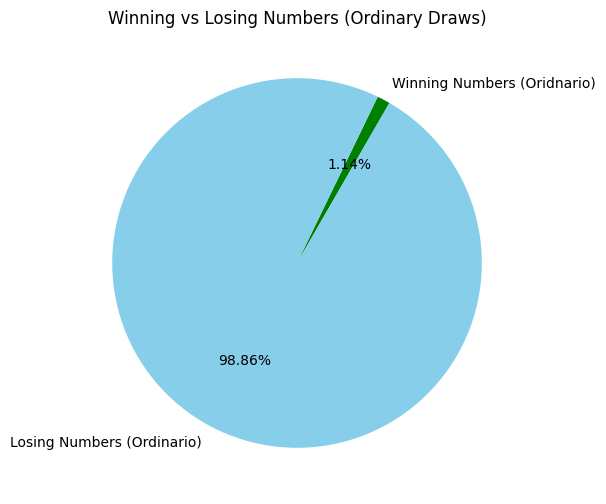

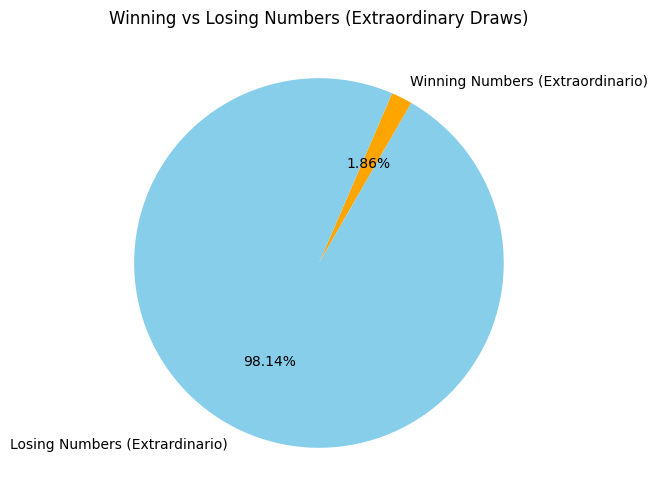

In [141]:
# data for ordinarios
losers_by_sorteo_ordinario = grand_total_tickets_issued_ordinario - winners_by_sorteo_ordinario

# data for extraordinarios
losers_by_sorteo_extraordinario = grand_total_tickets_issued_extraordinario - winners_by_sorteo_extraordinario

# Create labels for pie chart
labels_ordinario = ['Winning Numbers (Oridnario)', 'Losing Numbers (Ordinario)']
data_ordinario = [winners_by_sorteo_ordinario, losers_by_sorteo_ordinario]

labels_extraordinario = ['Winning Numbers (Extraordinario)', 'Losing Numbers (Extrardinario)']
data_extraordinario = [winners_by_sorteo_extraordinario, losers_by_sorteo_extraordinario]

# Do the pie chart
plt.figure(figsize=(6, 6))
plt.pie(data_ordinario, labels=labels_ordinario, autopct='%1.2f%%', startangle=60, colors=['green', 'skyblue'])
plt.title('Winning vs Losing Numbers (Ordinary Draws)')
plt.show()

plt.figure(figsize=(6, 6))
plt.pie(data_extraordinario, labels=labels_extraordinario, autopct='%1.2f%%', startangle=60, colors=['orange', 'skyblue'])
plt.title('Winning vs Losing Numbers (Extraordinary Draws)')
plt.show()

#### Calculate the Odds of getting a prize (not the big prize, just a prize)

In [142]:
cumulative_probability_ordinario = (100 - percentage_winning_numbers_ordinario) / percentage_winning_numbers_ordinario
print(f"Odds of winning a prize in a ordinario lottery is 1 in {cumulative_probability_ordinario:.0f}")

Odds of winning a prize in a ordinario lottery is 1 in 87


In [143]:
cumulative_probability_extraordinario = (100 - percentage_winning_numbers_extraordinario) / percentage_winning_numbers_extraordinario
print(f"Odds of winning a prize in a ordinario lottery is 1 in {cumulative_probability_extraordinario:.0f}")

Odds of winning a prize in a ordinario lottery is 1 in 53


So, answering the question: the percentage of winning numbers for ORDINARIOS draws is **1.14%** and for EXTRAORDINARIOS is **1.86%** something that basically means that in the ORDINARIO draw your chances of winning a prize is **1 in 87** meanwhile in an EXTRAODINARIO one the chances are **1 in 53**, so you have slightly more chances of winning some money in an EXTRAORDINARIO draw. 

## Profit and expenses of Loteria Santa Lucia

### Profit distribution of Loteria Santa Lucia: 

- 65% for prize payments and refunds.
- 16% discount for wholesale buyers who sell Loteria Santa Lucia tickets.
- 5% for the operating expenses of Loteria Santa Lucia.
- 14% for the economic sustainability of the programs and services of the Benemérito Comité Pro Ciegos y Sordos de Guatemala. 

[Loteria Santa Lucia](https://loteria.org.gt/site/about-us)

The price of the full tickets works as follows: 

1 "cachito" is a piece of 10, 10 "cachitos" make a full ticket.

Q7.00 by "cachito" or **Q70 the full ticket** when the big prize is **less than Q2,200,000**

Q15.00 by "cachito" or **Q150 the full ticket** when the big prize is **equal or more than Q2,200,000**

Q25.00 by "cachito" or **Q250 the full ticket** when the big prize is **equal or more than Q4,000,000**

Q30.00 by "cachito" or **Q300 the full ticket** when the big prize is **equal or more than Q6,000,000**

Q35.00 by "cachito" or **Q350 the full ticket** when the big prize is **equal or more than Q7,000,000**

The lotteries **ORDINARIO** are the ones that cost Q70.00 the full ticket, **EXTRAORDINARIO** ones are from Q15.00 up to Q35.00 or more.

[Loteria Santa Lucia Prices](https://loteria.org.gt/site/index)

In December 2024 Loteria Santa Lucia made public that they do the lottery once the reach the [80% of tickets sold](https://loteria.org.gt/site/raffle). This in order to be profitable and avoid losses of money. Based on **"Código Civil Decreto Ley Número 106, Artículo 2139"** of the [Guatemalan law.](https://www.oas.org/dil/esp/codigo_civil_guatemala.pdf)

## How much money does Santa Lucia make from ORDINARIOS and EXTRAORDINARIOS draws, and how much money does each beneficiary party receive?

In [144]:
def ticket_price(monto_premio):
    if monto_premio < 2_200_000:
        return 70 # Price by default, this should not happend in "extraordinarios"
    elif monto_premio >= 2_200_000 and monto_premio < 4_000_000:
        return 150
    elif monto_premio >= 4_000_000 and monto_premio < 6_000_000:
        return 250
    elif monto_premio >= 6_000_000 and monto_premio < 7_000_000:
        return 300
    elif monto_premio >= 7_000_000:
        return 350

## Scenario 1: Worst Case Scenario 
#### They only sold the 80% of all issued tickets in both ORDINARIO and EXTRAORDINARIO draws.

#### Profits by ORDINARIO

In [145]:
df_ordinarios.head()

,numero_sorteo,numero_premiado,letras,monto,vendedor,ciudad,departamento,tipo_sorteo,fecha_sorteo,fecha_caducidad,primer_premio,segundo_premio,tercer_premio,reintegro_primer_premio,reintegro_segundo_premio,reintegro_tercer_premio
1609,3047,61,TT,600.0,N/A,N/A,N/A,ORDINARIO,2024-06-15,2024-12-16,45100,74061,53248,0,1,8
1610,3047,100,TT,700.0,N/A,N/A,N/A,ORDINARIO,2024-06-15,2024-12-16,45100,74061,53248,0,1,8
1611,3047,150,PR,2070.0,ESDVIN ESTUARDO ROBLES VELÁSQUEZ,DE ESTA CAPITAL,GUATEMALA,ORDINARIO,2024-06-15,2024-12-16,45100,74061,53248,0,1,8
1612,3047,195,P,700.0,N/A,N/A,N/A,ORDINARIO,2024-06-15,2024-12-16,45100,74061,53248,0,1,8
1613,3047,205,P,2000.0,ROBERTO MARROQUÍN AYALA,DE ESTA CAPITAL,GUATEMALA,ORDINARIO,2024-06-15,2024-12-16,45100,74061,53248,0,1,8


In [146]:
# Extract only the 1st place numbers, number of draw and amount won of the draw
big_prize_won_ordinario = df_ordinarios[df_ordinarios['numero_premiado'] == df_ordinarios['primer_premio']]
big_prize_won_ordinario = big_prize_won_ordinario.reset_index()
big_prize_won_ordinario = big_prize_won_ordinario[['fecha_sorteo', 'numero_sorteo', 'numero_premiado', 'monto']]

# Add the price of the ticket for each draw
big_prize_won_ordinario['ticket_price'] = big_prize_won_ordinario['monto'].apply(ticket_price)
big_prize_won_ordinario = big_prize_won_ordinario.sort_values('fecha_sorteo', ascending=True)

big_prize_won_ordinario.head()


,fecha_sorteo,numero_sorteo,numero_premiado,monto,ticket_price
23,2024-06-01,3046,46063,1000000.0,70
0,2024-06-15,3047,45100,1000000.0,70
1,2024-06-22,3048,74569,1000000.0,70
2,2024-06-29,3049,8241,1000000.0,70
3,2024-07-06,3050,72487,1000000.0,70


In [147]:
big_prize_won_ordinario['tickets_sold_80_percent'] = 64_000 # 80% of 80,000 of the tickets for each draw

# Calculate total profits for each draw
big_prize_won_ordinario['total_revenue'] = big_prize_won_ordinario['tickets_sold_80_percent'] * big_prize_won_ordinario['ticket_price']

# Calculate all total profits of 'ORDINARIO' draws
total_revenue_ordinarios_sce1 = big_prize_won_ordinario['total_revenue'].sum()
print(f"Total revenue from ordinary draws in the worst case scenario: Q{total_revenue_ordinarios_sce1:,}")

Total revenue from ordinary draws in the worst case scenario: Q107,520,000


#### Weekly Average profit for "ORDINARIO" draws

In [148]:
weekly_average_profit_ord_sce1 = total_revenue_ordinarios_sce1 / len(big_prize_won_ordinario)
print(f"In the worst case scenario: The total weekly average profit of 'ORDINARIO' draws is: Q{weekly_average_profit_ord_sce1:,}")

In the worst case scenario: The total weekly average profit of 'ORDINARIO' draws is: Q4,480,000.0


### Profist for EXTRAORDINARIO

In [149]:
df_extraordinarios.head()

,numero_sorteo,numero_premiado,letras,monto,vendedor,ciudad,departamento,tipo_sorteo,fecha_sorteo,fecha_caducidad,primer_premio,segundo_premio,tercer_premio,reintegro_primer_premio,reintegro_segundo_premio,reintegro_tercer_premio
0,390,44,P,600.0,N/A,N/A,N/A,EXTRAORDINARIO,2024-06-08,2024-12-09,16780,46129,77885,0,9,5
1,390,80,DT,600.0,N/A,N/A,N/A,EXTRAORDINARIO,2024-06-08,2024-12-09,16780,46129,77885,0,9,5
2,390,129,TT,1000.0,N/A,N/A,N/A,EXTRAORDINARIO,2024-06-08,2024-12-09,16780,46129,77885,0,9,5
3,390,180,DT,600.0,N/A,N/A,N/A,EXTRAORDINARIO,2024-06-08,2024-12-09,16780,46129,77885,0,9,5
4,390,228,P,800.0,N/A,N/A,N/A,EXTRAORDINARIO,2024-06-08,2024-12-09,16780,46129,77885,0,9,5


In [150]:
# Extract only the 1st place numbers, number of draw and amount won of the draw
big_prize_won_extraordinario = df_extraordinarios[df_extraordinarios['primer_premio'] == df_extraordinarios['numero_premiado']]
big_prize_won_extraordinario = big_prize_won_extraordinario.reset_index()
big_prize_won_extraordinario = big_prize_won_extraordinario[['fecha_sorteo', 'numero_sorteo', 'numero_premiado', 'monto']]

# Add the price of the ticket for each draw
big_prize_won_extraordinario['ticket_price'] = big_prize_won_extraordinario['monto'].apply(ticket_price)
big_prize_won_extraordinario = big_prize_won_extraordinario.sort_values('fecha_sorteo', ascending=True)
big_prize_won_extraordinario

,fecha_sorteo,numero_sorteo,numero_premiado,monto,ticket_price
0,2024-06-08,390,16780,2200000.0,150
1,2024-07-21,391,1095,5000000.0,250
2,2024-08-17,392,78858,2200000.0,150
3,2024-09-21,393,39647,2200150.0,150
4,2024-10-19,394,59456,2200000.0,150
5,2024-11-23,395,55049,2200000.0,150


In [151]:
big_prize_won_extraordinario['tickets_sold_80_percent'] = 72_000 # 80% of 90,000 of the tickets for each draw

# Calculate total profits for each draw
big_prize_won_extraordinario['total_revenue'] = big_prize_won_extraordinario['tickets_sold_80_percent'] * big_prize_won_extraordinario['ticket_price']

# Calculate all total profits of 'ORDINARIO' draws
total_revenue_extraordinarios_sce1 = big_prize_won_extraordinario['total_revenue'].sum()
print(f"Total revenue from ordinary draws in the worst case scenario: Q{total_revenue_extraordinarios_sce1:,}")

Total revenue from ordinary draws in the worst case scenario: Q72,000,000


#### Average profit for "EXTRAORDINARIO" draws

In [152]:
average_profit_extord_sce1 = total_revenue_extraordinarios_sce1 / len(big_prize_won_extraordinario)
print(f"In the worst case scenario: The total average profit of 'EXTRAORDINARIO' draws is: Q{average_profit_extord_sce1:,}")

In the worst case scenario: The total average profit of 'EXTRAORDINARIO' draws is: Q12,000,000.0


### Scenario 2: Best Case Scenario 
They sold the 100% of all issued tickets in both ORDINARIO and EXTRAORDINARIO draws.

#### Calculate profits for ORDINARIO 

In [153]:
big_prize_won_ordinario['tickets_sold_100_percent'] = 80_000

# Calculate total profits for each draw
big_prize_won_ordinario['total_revenue'] = big_prize_won_ordinario['tickets_sold_100_percent'] * big_prize_won_ordinario['ticket_price']

# Calculate all total profits of 'ORDINARIO' draws
total_revenue_ordinarios_sce2 = big_prize_won_ordinario['total_revenue'].sum()
print(f"Total revenue from ordinary draws in the best case scenario: Q{total_revenue_ordinarios_sce2:,}")

Total revenue from ordinary draws in the best case scenario: Q134,400,000


#### Weekly Average profit for "ORDINARIO" draws

In [154]:
weekly_average_profit_ord_sce2 = total_revenue_ordinarios_sce1 / len(big_prize_won_ordinario)
print(f"In the worst case scenario: The total weekly average profit of 'ORDINARIO' draws is: Q{weekly_average_profit_ord_sce2:,}")

In the worst case scenario: The total weekly average profit of 'ORDINARIO' draws is: Q4,480,000.0


#### Calculate profits for  EXTRAORDINARIO 

In [155]:
big_prize_won_extraordinario['tickets_sold_100_percent'] = 90_000

# Calculate total profits for each draw
big_prize_won_extraordinario['total_revenue'] = big_prize_won_extraordinario['tickets_sold_100_percent'] * big_prize_won_extraordinario['ticket_price']

# Calculate all total profits of 'ORDINARIO' draws
total_revenue_extraordinarios_sce2 = big_prize_won_extraordinario['total_revenue'].sum()
print(f"Total revenue from ordinary draws in the best case scenario: Q{total_revenue_extraordinarios_sce2:,}")

Total revenue from ordinary draws in the best case scenario: Q90,000,000


#### Average profit for "EXTRAORDINARIO" draws

In [156]:
average_profit_extord_sce2 = total_revenue_extraordinarios_sce2 / len(big_prize_won_extraordinario)
print(f"In the worst case scenario: The total average profit of 'EXTRAORDINARIO' draws is: Q{average_profit_extord_sce2:,}")

In the worst case scenario: The total average profit of 'EXTRAORDINARIO' draws is: Q15,000,000.0


### Graph for profits for ORDINARIO and EXTRAORDINARIO

65% for prize payments and refunds

16% discount for wholesale buyers who sell Santa Lucía Lottery tickets.

5% for the operating expenses of Santa Lucía Lottery

14% for the economic sustainability of the programs and services of the Benemérito Comité Pro Ciegos y Sordos de Guatemala
